## Student name: Haonan Xu, ID:77748987436

### (a) Preparation

In [1]:
!pip install regressors

In [2]:
# All imports needed in this file
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from regressors import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing

In [3]:
# Read .xlsx doc as dataframe
xlsx = pd.ExcelFile("../data/Folds5x2_pp.xlsx")
df = pd.read_excel(xlsx, "Sheet1")

### (b) (i)


In [4]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


## There are 9568 rows and 5 columns in the data set. Rows represents data points collected from CCPP over 6 years. First 4 columns represents 4 features: hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V); The last column is the net hourly electrical energy output of the plant.

### (b) (ii)

#### T vs. V

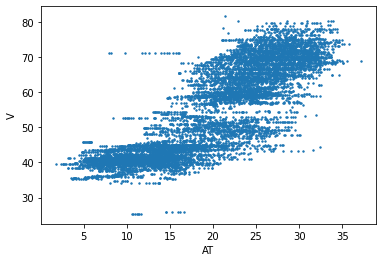

In [5]:
df.plot(kind='scatter', x='AT', y='V', s=2)

#### T vs. AP

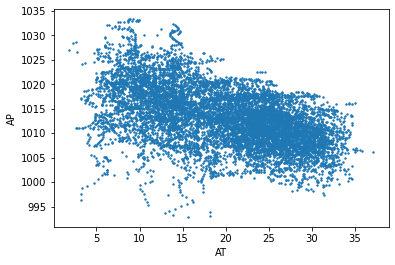

In [6]:
df.plot(kind='scatter', x='AT', y='AP', s=2)

#### T vs. RH

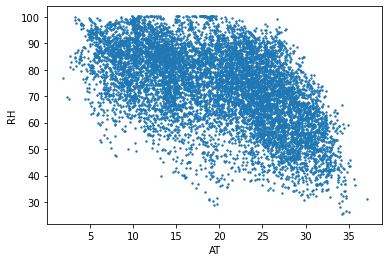

In [7]:
df.plot(kind='scatter', x='AT', y='RH', s=2)

#### T vs. PE

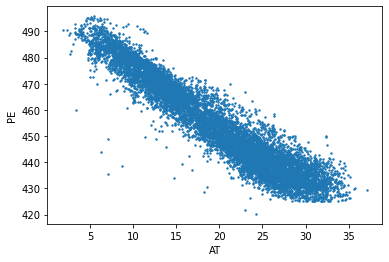

In [8]:
df.plot(kind='scatter', x='AT', y='PE', s=2)

#### V vs. AP

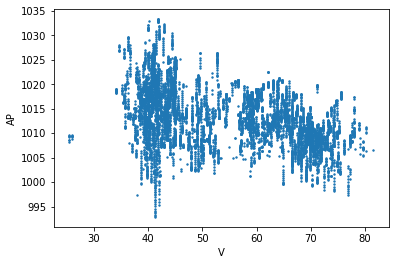

In [9]:
df.plot(kind='scatter', x='V', y='AP', s=2)

#### V vs. RH

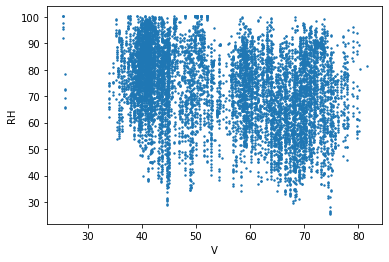

In [10]:
df.plot(kind='scatter', x='V', y='RH', s=2)

#### V vs. PE

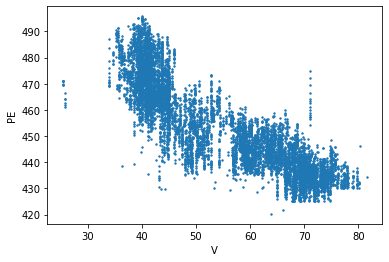

In [11]:
df.plot(kind='scatter', x='V', y='PE', s=2)

#### AP vs. RH

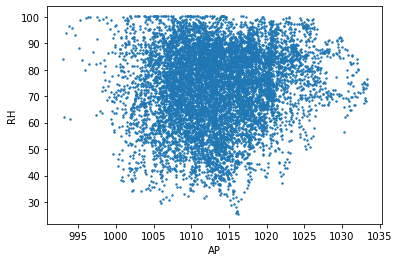

In [12]:
df.plot(kind='scatter', x='AP', y='RH', s=2)

#### AP vs. PE

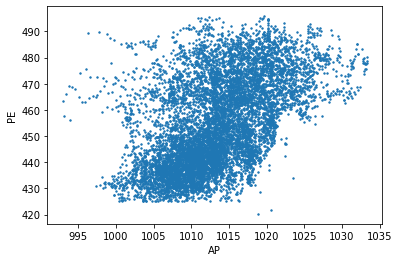

In [13]:
df.plot(kind='scatter', x='AP', y='PE', s=2)

#### RH vs. PE

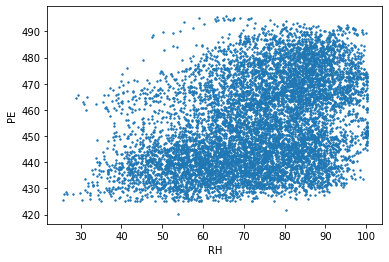

In [14]:
df.plot(kind='scatter', x='RH', y='PE', s=2)

## Only 2 independent variables T and V are obviously related to the dependent variable PE.

### (b) (iii)

In [15]:
# Mean
means = df.mean().tolist()

In [16]:
# Median
medians = df.median().tolist()

In [17]:
# range
ranges_low = df.min().tolist()
ranges_high = df.max().tolist()

In [18]:
# 1st and 3rd quartiles
first_quartile = df.quantile(q=0.25).tolist()
third_quartile = df.quantile(q=0.75).tolist()

In [19]:
# Interquartile ranges
zipped = zip(third_quartile, first_quartile)
interquartile_range = []
for third, first in zipped:
    interquartile_range.append(third-first)

In [20]:
# Table Presentation
table = pd.DataFrame({'Means': means,
                      'Medians': medians,
                      'LowerBound': ranges_low,
                      'UpperBound': ranges_high,
                      'First Quartile': first_quartile,
                      'Third Quartile': third_quartile,
                      'IQR': interquartile_range},
                      index=['T','V','AP','RH','PE'])
table

,Means,Medians,LowerBound,UpperBound,First Quartile,Third Quartile,IQR
T,19.651231,20.345,1.81,37.11,13.5100,25.72,12.2100
V,54.305804,52.080,25.36,81.56,41.7400,66.54,24.8000
AP,1013.259078,1012.940,992.89,1033.30,1009.1000,1017.26,8.1600
RH,73.308978,74.975,25.56,100.16,63.3275,84.83,21.5025
PE,454.365009,451.550,420.26,495.76,439.7500,468.43,28.6800


### (c)

In [21]:
# plotting function
def regr_plot(x, y, model):
    plt.scatter(x, y,  color='c', s=2)
    plt.plot(x, model.predict(x), color='blue', linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.show()

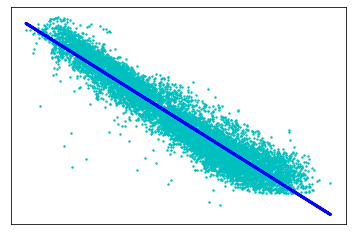

In [22]:
# T's model
x = df.AT.values
x = x.reshape(len(x),1)
y = df.PE.values
y = y.reshape(len(y),1)
T_regr = linear_model.LinearRegression()
T_result = T_regr.fit(x,y)
regr_plot(x,y,T_regr)

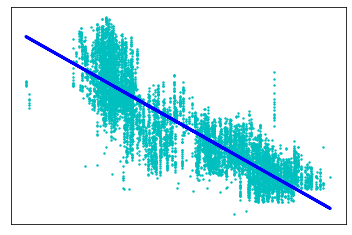

In [23]:
# V's model
x = df.V.values
x = x.reshape(len(x),1)
y = df.PE.values
y = y.reshape(len(y),1)
V_regr = linear_model.LinearRegression()
V_result = V_regr.fit(x,y)
regr_plot(x,y,V_regr)

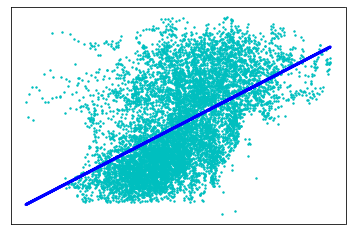

In [24]:
# AP's model
x = df.AP.values
x = x.reshape(len(x),1)
y = df.PE.values
y = y.reshape(len(y),1)
AP_regr = linear_model.LinearRegression()
AP_result = AP_regr.fit(x,y)
regr_plot(x,y,AP_regr)

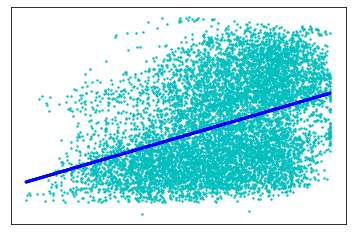

In [25]:
# RH's model
x = df.RH.values
x = x.reshape(len(x),1)
y = df.PE.values
y = y.reshape(len(y),1)
RH_regr = linear_model.LinearRegression()
RH_result = RH_regr.fit(x,y)
regr_plot(x,y,RH_regr)

## I found that hourly average ambient variables Temperature (T)'s and Ambient Pressure (AP)'s models are statistically significant. Outliers from these two models are also obvious. However, for the other two variabels, the regression models did not gives good senses of outliers data.

### (d)

In [26]:
X = df[['AT','V','AP','RH']]
y = df['PE']
multi_regr = linear_model.LinearRegression()
multi_result = multi_regr.fit(X,y)
xlabels = ['AT','V','AP','RH']
stats.summary(multi_regr, X, y, xlabels)

Residuals:
     Min      1Q  Median     3Q      Max
-17.7777 -3.2008  0.1177  3.166  43.4354


Coefficients:
              Estimate  Std. Error   t value  p value
_intercept  454.609274    9.745958   46.6459      0.0
AT           -1.977513    0.012978 -152.3777      0.0
V            -0.233916    0.005588  -41.8605      0.0
AP            0.062083    0.000088  702.9612      0.0
RH           -0.158054    0.003557  -44.4405      0.0
---
R-squared:  0.92870,    Adjusted R-squared:  0.92867
F-statistic: 31138.27 on 4 features


## We can reject the null hypothesis for all predictors, because p value is 0. This means that the probability of seeing a t statistic extremer than what was observed assuming the β1=0 is almost 0. In addition, our t value are large indicating our alternative hypothesis is very strong. 

## (e)

In [27]:
c_coef = []
c_coef.append(T_result.coef_[0][0])
c_coef.append(V_result.coef_[0][0])
c_coef.append(AP_result.coef_[0][0])
c_coef.append(RH_result.coef_[0][0])
c_coef

[-2.171319958517794, -1.168135126555713, 1.489871673399114, 0.4556501022629802]

In [28]:
(multi_result.coef_)

array([-1.97751311, -0.23391642,  0.06208294, -0.1580541 ])

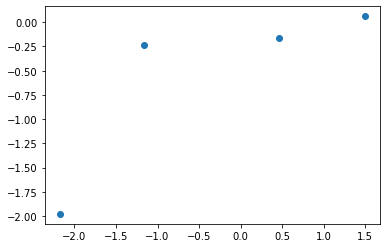

In [29]:
N=50
x_x = c_coef
y_y = multi_result.coef_

plt.scatter(x_x, y_y)
plt.show()

## Absolute value of Difference between univariate and multiple regression coefficients: 

In [30]:
print("T: ",abs(c_coef[0]-multi_result.coef_[0]),"V: ",abs(c_coef[1]-multi_result.coef_[1]), "AP: ",abs(c_coef[2]-multi_result.coef_[2]), "RH: ",abs(c_coef[3]-multi_result.coef_[3]))

T:  0.193806851882399 V:  0.9342187039732142 AP:  1.4277887296182579 RH:  0.6137042051793942


## From the graph above we can see that predictor "T " has the smallest difference when comparing its coefficient from 1c and 1d. It may imply that "T" makes a significant contribution for predicting the output, since when we switch from univariate to multiple regression, its coefficient does not change too much.

## (f)

In [31]:
# plotting function for poly
def regr_plot_poly(xxx,px, py, model_y,str1,str2):
    plt.scatter(px, py,  color='c', s=2)
    plt.plot(xxx, model_y, color='blue')
    plt.xticks(())
    plt.yticks(())
    plt.title("Non-Linear relation")
    plt.xlabel(str1) 
    plt.ylabel(str2)
    plt.show()

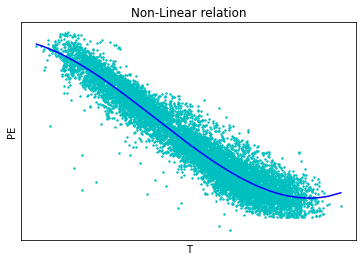

In [32]:
# Predictor T
poly_T = PolynomialFeatures(3)
T_x = df.AT.values.reshape(-1,1)
T_y = df.PE.values.reshape(-1,1)
transform_t_x = poly_T.fit_transform(T_x)

poly_t_model = linear_model.LinearRegression()
poly_t_model.fit(transform_t_x,T_y)

T_x2 = df.AT.values.reshape(-1,1)
T_x3 = np.sort(T_x2, axis=0) 
transform_t_x2 = poly_T.fit_transform(T_x3)
y_pred = poly_t_model.predict(transform_t_x2)

str_AT = "T"
str_PE = "PE"
regr_plot_poly(T_x3,T_x,T_y, y_pred,str_AT,str_PE)

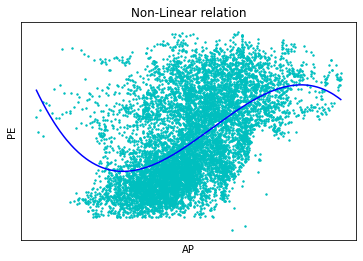

In [33]:
# Predictor AP
poly_AP = PolynomialFeatures(3)
T_x = df.AP.values.reshape(-1,1)
T_y = df.PE.values.reshape(-1,1)
transform_t_x = poly_T.fit_transform(T_x)

poly_ap_model = linear_model.LinearRegression()
poly_ap_model.fit(transform_t_x,T_y)

T_x2 = df.AP.values.reshape(-1,1)
T_x3 = np.sort(T_x2, axis=0) 
transform_t_x2 = poly_AP.fit_transform(T_x3)
y_pred = poly_ap_model.predict(transform_t_x2)

str_x = "AP"
str_y = "PE"
regr_plot_poly(T_x3,T_x,T_y, y_pred,str_x,str_y)

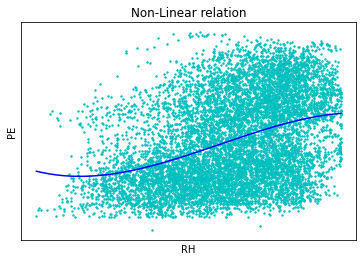

In [34]:
# Predictor RH
poly_RH = PolynomialFeatures(3)
T_x = df.RH.values.reshape(-1,1)
T_y = df.PE.values.reshape(-1,1)
transform_t_x = poly_T.fit_transform(T_x)

poly_rh_model = linear_model.LinearRegression()
poly_rh_model.fit(transform_t_x,T_y)

T_x2 = df.RH.values.reshape(-1,1)
T_x3 = np.sort(T_x2, axis=0) 
transform_t_x2 = poly_RH.fit_transform(T_x3)
y_pred = poly_rh_model.predict(transform_t_x2)

str_x = "RH"
str_y = "PE"
regr_plot_poly(T_x3,T_x,T_y, y_pred,str_x,str_y)

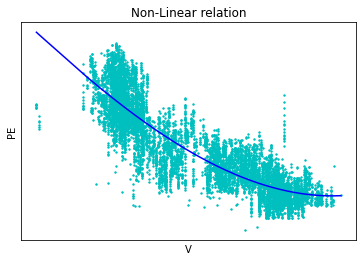

In [35]:
# Predictor V
poly_V = PolynomialFeatures(3)
T_x = df.V.values.reshape(-1,1)
T_y = df.PE.values.reshape(-1,1)
transform_t_x = poly_T.fit_transform(T_x)

poly_v_model = linear_model.LinearRegression()
poly_v_model.fit(transform_t_x,T_y)

T_x2 = df.V.values.reshape(-1,1)
T_x3 = np.sort(T_x2, axis=0) 
transform_t_x2 = poly_V.fit_transform(T_x3)
y_pred = poly_v_model.predict(transform_t_x2)

str_x = "V"
str_y = "PE"
regr_plot_poly(T_x3,T_x,T_y, y_pred,str_x,str_y)

## (g)

In [36]:
reg_g = PolynomialFeatures(2, interaction_only=True)

In [37]:
g_y = df.PE.values

In [38]:
data_g = df[['AT','V','AP','RH']].values

In [39]:
transform_g = reg_g.fit_transform(data_g) 

In [40]:
reg_g_model = linear_model.LinearRegression()

In [41]:
reg_g_model.fit(transform_g,g_y)

LinearRegression()

In [42]:
X = df[['AT','V','AP','RH']]
y = df['PE']
multi_regr = linear_model.LinearRegression()
multi_result = multi_regr.fit(X,y)
xlabels = ['AT','V','AP','RH']
stats.summary(reg_g_model, transform_g, y,reg_g.get_feature_names())

Residuals:
     Min      1Q  Median      3Q      Max
-18.6554 -2.9601  0.0346  2.8693  45.4926


Coefficients:
              Estimate                  Std. Error               t value   p value
_intercept  685.782468  0.000000e+00+9.914949e+13j    0.000000-0.000000j  1.000000
1             0.000000  0.000000e+00+9.914949e+13j    0.000000+0.000000j  1.000000
x0           -4.347014  2.230794e+00+0.000000e+00j   -1.948600+0.000000j  0.051368
x1           -7.674858  1.132064e+00+0.000000e+00j   -6.779500+0.000000j  0.000000
x2           -0.152355  1.642200e-02+0.000000e+00j   -9.277400+0.000000j  0.000000
x3            1.570907  6.963050e-01+0.000000e+00j    2.256100-0.000000j  0.024089
x0 x1         0.020971  6.800000e-04+0.000000e+00j   30.848600-0.000000j  0.000000
x0 x2         0.001759  2.000000e-05+0.000000e+00j   88.295700-0.000000j  0.000000
x0 x3        -0.005230  7.220000e-04-0.000000e+00j   -7.246900-0.000000j  0.000000
x1 x2         0.006812  9.000000e-06+0.000000e+00j  780.779

## From the table above, we can see that all the interaction terms have nearly 0 p-value(except X1*X3), which means all of them have strong evidence against null hypothesis. All of them are statistically significant

## （h）

In [43]:
#Model with all predictors 70% subset
df_sample_70 = df.sample(frac= 7/10, random_state=0)
df_test = df.drop(df_sample_70.index)

h_x = df_sample_70[['AT','V','AP','RH']].values
h_y = df_sample_70['PE'].values

reg_h_model = linear_model.LinearRegression()
reg_h_model.fit(h_x,h_y)

h_x_labels = ['AT','V','AP','RH']
stats.summary(reg_h_model, h_x, h_y, h_x_labels)

Residuals:
     Min      1Q  Median      3Q      Max
-17.8773 -3.2246  0.1058  3.1483  43.5936


Coefficients:
              Estimate  Std. Error   t value  p value
_intercept  462.531969   11.614493   39.8237      0.0
AT           -2.013199    0.015552 -129.4496      0.0
V            -0.220597    0.006704  -32.9062      0.0
AP            0.054438    0.000105  517.1272      0.0
RH           -0.160881    0.004227  -38.0642      0.0
---
R-squared:  0.92962,    Adjusted R-squared:  0.92958
F-statistic: 22101.16 on 4 features


In [44]:
#Models with independent, pairwise, quadratic predictors on 70%  subset
h_2_x = df_sample_70[['AT','V','AP','RH']].values
h_2_y = df_sample_70['PE'].values
data_h_2_x= h_2_x

h_2_features = PolynomialFeatures(2)
transform_h_2 = h_2_features.fit_transform(data_h_2_x) 

h_2_model = linear_model.LinearRegression()
result = h_2_model.fit(transform_h_2,h_2_y)

h_fearture_name = h_2_features.get_feature_names()

In [45]:
import statsmodels.api as sm

mod = sm.OLS(h_2_y,transform_h_2)

fii = mod.fit()

fii.summary2(xname=h_fearture_name)

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.939     
Dependent Variable: y                AIC:                38425.9185
Date:               2020-09-25 22:58 BIC:                38528.0620
No. Observations:   6698             Log-Likelihood:     -19198.   
Df Model:           14               F-statistic:        7323.     
Df Residuals:       6683             Prob (F-statistic): 0.00      
R-squared:          0.939            Scale:              18.116    
-------------------------------------------------------------------
           Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
-------------------------------------------------------------------
1        -7974.1425 1412.5426 -5.6452 0.0000 -10743.1767 -5205.1084
x0          -1.9860    3.6586 -0.5428 0.5873     -9.1580     5.1859
x1          -4.9258    1.7833 -2.7621 0.0058     -8.4217    -1.4299
x2          16.5147    2.7396  6.0282 0.0000     11.1443    21.8852
x3           5.0437    1.0350  4.8733 0.0000      3.0148     7.0725
x0^2         0.0146    0.0037  3.9383 0.0001      0.0073     0.0219
x0 x1        0.0131    0.0033  4.0172 0.0001      0.0067     0.0195
x0 x2       -0.0007    0.0036 -0.1839 0.8541     -0.0076     0.0063
x0 x3       -0.0064    0.0018 -3.6248 0.0003     -0.0099    -0.0030
x1^2        -0.0016    0.0010 -1.6594 0.0971     -0.0034     0.0003
x1 x2        0.0045    0.0017  2.5648 0.0103      0.0010     0.0079
x1 x3        0.0006    0.0008  0.7026 0.4823     -0.0010     0.0021
x2^2        -0.0080    0.0013 -6.0414 0.0000     -0.0106    -0.0054
x2 x3       -0.0047    0.0010 -4.7152 0.0000     -0.0067    -0.0028
x3^2        -0.0020    0.0003 -6.4649 0.0000     -0.0026    -0.0014
-------------------------------------------------------------------
Omnibus:             1246.508     Durbin-Watson:        2.019      
Prob(Omnibus):       0.000        Jarque-Bera (JB):     9322.823   
Skew:                -0.689       Prob(JB):             0.000      
Kurtosis:            8.613        Condition No.:        28007953482
===================================================================
* The condition number is large (3e+10). This might indicate
strong multicollinearity or other numerical problems.
"""

## Here we let p=0.05 be the threshold. Discard any predictors that has a p value larger than 0.05, so remove x1x3, x1^2, x0x2,x0.

In [46]:
#refit the model with pruned predictors
h_3_features = PolynomialFeatures(2)
transform_h_3 = h_3_features.fit_transform(data_h_2_x) 
pruned_h_3 = np.delete(transform_h_3, [1,7,9,11], axis=1)

h_3_model = linear_model.LinearRegression()
h_3_model.fit(pruned_h_3,h_2_y)




LinearRegression()

In [47]:
transform_h_3[0]

array([1.00000000e+00, 2.86600000e+01, 7.79500000e+01, 1.00956000e+03,
       6.90700000e+01, 8.21395600e+02, 2.23404700e+03, 2.89339896e+04,
       1.97954620e+03, 6.07620250e+03, 7.86952020e+04, 5.38400650e+03,
       1.01921139e+06, 6.97303092e+04, 4.77066490e+03])

In [48]:
mod = sm.OLS(h_2_y,pruned_h_3)

fii = mod.fit()

fii.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.934     
Dependent Variable: y                AIC:                38949.0002
Date:               2020-09-25 22:58 BIC:                39023.9054
No. Observations:   6698             Log-Likelihood:     -19464.   
Df Model:           10               F-statistic:        9426.     
Df Residuals:       6687             Prob (F-statistic): 0.00      
R-squared:          0.934            Scale:              19.599    
-------------------------------------------------------------------
          Coef.     Std.Err.    t     P>|t|     [0.025     0.975]  
-------------------------------------------------------------------
const  -11034.7651 1276.5432  -8.6443 0.0000 -13537.1967 -8532.3334
x1          6.5348    1.0053   6.5004 0.0000      4.5641     8.5055
x2         21.4596    2.4898   8.6190 0.0000     16.5788    26.3404
x3         11.9256    0.7829  15.2333 0.0000     10.3909    13.4602
x4         -0.0079    0.0021  -3.7820 0.0002     -0.0120    -0.0038
x5          0.0043    0.0016   2.6877 0.0072      0.0012     0.0074
x6         -0.0253    0.0004 -66.1206 0.0000     -0.0260    -0.0245
x7         -0.0068    0.0010  -6.9127 0.0000     -0.0087    -0.0049
x8         -0.0100    0.0012  -8.2194 0.0000     -0.0124    -0.0076
x9         -0.0107    0.0008 -13.9161 0.0000     -0.0122    -0.0092
x10        -0.0053    0.0002 -21.6209 0.0000     -0.0058    -0.0048
-------------------------------------------------------------------
Omnibus:            959.270      Durbin-Watson:         2.008      
Prob(Omnibus):      0.000        Jarque-Bera (JB):      5518.709   
Skew:               -0.555       Prob(JB):              0.000      
Kurtosis:           7.306        Condition No.:         24329992751
===================================================================
* The condition number is large (2e+10). This might indicate
strong multicollinearity or other numerical problems.
"""

In [49]:
# MSE 

In [50]:
# MSE for the model with pruned predictors   test
df_test_x = df_test[['AT','V','AP','RH']].values
df_test_true_y = df_test['PE'].values
test_x_trans = h_3_features.fit_transform(df_test_x)
test_x_trans_prune = np.delete(test_x_trans, [1,7,9,11], axis=1)

In [51]:
pred_result_y = h_3_model.predict(test_x_trans_prune)

In [52]:
print("MSE for the model with pruned predictors: ",mean_squared_error(df_test_true_y, pred_result_y))

MSE for the model with pruned predictors:  19.492132570671746


In [53]:
# MSE for the model with 4 origin predictors  test
pred_reg_y = reg_h_model.predict(df_test_x)
print("MSE for the model with 4 origin predictors: ",mean_squared_error(df_test_true_y, pred_reg_y))

MSE for the model with 4 origin predictors:  20.763868211339336


## Test: MSE for the model with pruned predictors:  19.492132570671416
## Test: MSE for the model with 4 origin predictors:  20.763868211339343    

In [54]:
# MSE for the model with pruned predictors   train
pred_result_y_train= h_3_model.predict(pruned_h_3)
print("Train: MSE for the model with pruned predictors: ",mean_squared_error(h_2_y, pred_result_y_train))

Train: MSE for the model with pruned predictors:  19.567261028854702


In [55]:
# MSE for the model with 4 origin predictors   train
pred_result_y_train_2= reg_h_model.predict(h_x)
print("Train: MSE for the model with 4 origin predictors: ",mean_squared_error(h_2_y, pred_result_y_train_2))

Train: MSE for the model with 4 origin predictors:  20.789116303485127


## Train: MSE for the model with pruned predictors:  19.56726102885516
## Train: MSE for the model with 4 origin predictors:  20.789116303485127    

# (i)

In [56]:
# knn regressor with raw data 70 for train 30 for test

In [57]:
knn_train_X = df_sample_70[['AT','V','AP','RH']].values
knn_train_Y = df_sample_70['PE'].values
knn_test_X = df_test[['AT','V','AP','RH']].values
knn_test_Y = df_test['PE'].values

In [58]:
k = 1
knn_train_mse = []
knn_test_mse = []
k_val = []

while True:
  neigh = KNeighborsRegressor(n_neighbors=k)
  neigh.fit(knn_train_X, knn_train_Y)
  pred_Y_train = neigh.predict(knn_train_X)
  pred_Y_test = neigh.predict(knn_test_X)
  knn_train_mse.append(mean_squared_error(knn_train_Y,pred_Y_train))
  knn_test_mse.append(mean_squared_error(knn_test_Y,pred_Y_test))
  k_val.append(k)
  if k > 99:
    break
  k=k+1

In [59]:
knn_train_mse_np = np.asarray(knn_train_mse)
knn_test_mse_np = np.asarray(knn_test_mse)

In [60]:
k_val_np = np.asarray(k_val)
k_val_normal = np.asarray(k_val)
k_val_np = k_val_np.astype(float)
k_recip = np.reciprocal(k_val_np)

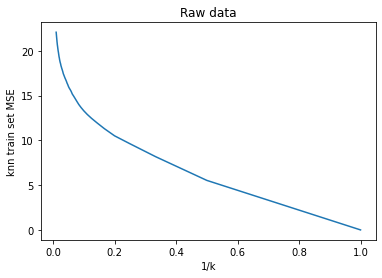

In [61]:
plt.title("Raw data")
x = k_recip
y = knn_train_mse_np
plt.xlabel("1/k") 
plt.ylabel("knn train set MSE") 
plt.plot(x,y) 
plt.show()

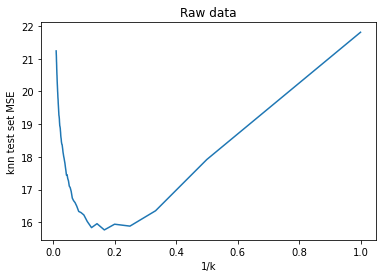

In [62]:
plt.title("Raw data")
x = k_recip
y = knn_test_mse_np
plt.xlabel("1/k") 
plt.ylabel("knn test set MSE") 
plt.plot(x,y) 
plt.show()

In [63]:
# knn regressor with normalized data 70 for train 30 for test

In [64]:
normalized_train_X = preprocessing.normalize(knn_train_X, norm='l2')
normalized_test_X = preprocessing.normalize(knn_test_X,norm='l2')

In [65]:
k = 1
norm_train_mse = []
norm_test_mse = []

while True:
  neigh_norm = KNeighborsRegressor(n_neighbors=k)
  neigh_norm.fit(normalized_train_X, knn_train_Y)
    
  pred_Y_train_norm = neigh_norm.predict(normalized_train_X)
  pred_Y_test_norm = neigh_norm.predict(normalized_test_X)
    
  norm_train_mse.append(mean_squared_error(knn_train_Y,pred_Y_train_norm))
  norm_test_mse.append(mean_squared_error(knn_test_Y,pred_Y_test_norm))

  if k > 99:
    break
  k=k+1

In [66]:
norm_train_mse_np = np.asarray(norm_train_mse)
norm_test_mse_np = np.asarray(norm_test_mse)

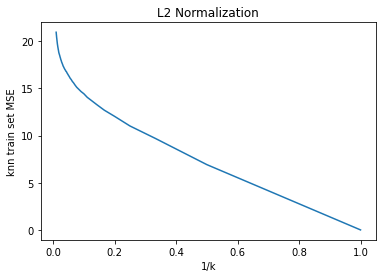

In [67]:
plt.title("L2 Normalization")
x = k_recip
y = norm_train_mse_np
plt.xlabel("1/k") 
plt.ylabel("knn train set MSE") 
plt.plot(x,y) 
plt.show()

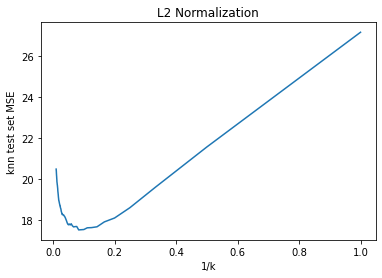

In [68]:
plt.title("L2 Normalization")
x = k_recip
y = norm_test_mse_np
plt.xlabel("1/k") 
plt.ylabel("knn test set MSE") 
plt.plot(x,y) 
plt.show()

In [69]:
print("Optimal K for test error in raw data: ", k_val_normal[np.argmin(knn_test_mse_np)], " ", "It has MSE: ", np.min(knn_test_mse_np))

Optimal K for test error in raw data:  6   It has MSE:  15.766480853658535


In [70]:
print("Optimal K for test error in Normalized data: ", k_val_normal[np.argmin(norm_test_mse_np)], " ", "It has MSE: ", np.min(norm_test_mse_np))

Optimal K for test error in Normalized data:  12   It has MSE:  17.534639045199373


## Optimal K for test error in raw data:  6   It has MSE:  15.766480853658535
## Optimal K for test error in Normalized data:  12   It has MSE:  17.534639045199373

## Comparing the results of KNN Regression with the linear regression model that has smallest test error, I found that knn with no normalization performs the best.  


## 2.4.1
### a) Flexible methods do better. Since the sample size (n) is large and p is small, it would be less likely to have an overfitting problem. Using a flexible statistical learning method also reduces bias. 
### b) Flexible methods do worse. Since n is small and p is already large, if we include more parameters, there would be an overfitting problem which causes more errors. A small sample size also leads to a bigger variance.
### c) Flexible methods do better. If the relationship between predictors and response is highly non-linear, then a flexible model can be used to fit and show its non-linear effect.
### d) Flexible methods do worse. If the variance is already extremely high, using a flexible model will make it worse with even bigger variance inflation caused by too much noise.


## 2.4.7
### a) Euclidean distance = sqrt((sum((sum((q_n-p_n)^2))), distances are the following
### Obs_1 = 3
### Obs_2 =2
### Obs_3 =3.16
### Obs_4 =2.24
### Obs_5 =1.41
### Obs_6 =1.73
### b) Green. Just the closest one 
### c) It’s observation 2,5,6, the majority takes Red, so Red

### d) Small. Since a large K reduces the flexibility of the model, then we would expect a small K for highly nonlinear, because it requires high flexible approach
